In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd
from math import floor
from scipy.optimize import curve_fit as cf
import scipy.stats as stats

In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [3]:
dcmls = lambda x : -int(floor(np.log10(abs(x))))

round_error = lambda value,rounder : np.round(value,dcmls(rounder))

def chi2(y,y_err,x,func,popt):
    y_ajuste = func(x,*popt)
    chi_cuadrado = np.sum(((y-y_ajuste)/y_err)**2)
    return chi_cuadrado

def chi2_red(y,y_err,x,func,popt):
    chi_cuadrado = chi2(y,y_err,x,func,popt)
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    chi_reducido = chi_cuadrado/grados_lib
    return chi_reducido

def pvalue(y,y_err,x,func,popt):
    chi_cuadrado = chi2(y,y_err,x,func,popt)
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    pvalor = stats.chi2.sf(chi_cuadrado,grados_lib)
    return pvalor

In [4]:
from scipy.signal import find_peaks as fp

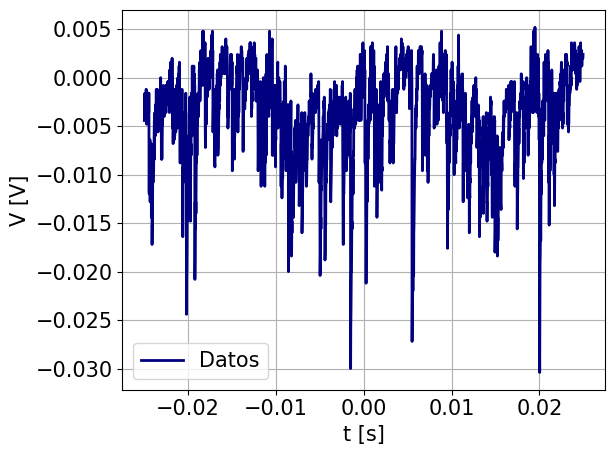

In [275]:
df = pd.read_csv('plots/clase1/tanda full 1/0.csv')

#pk_idxs = fp(-df.V1,prominence=0.0081)[0]

#plt.scatter(df.t,df.V1,c='navy',label='Datos')
plt.plot(df.t,df.V1,'navy',label='Datos')
#plt.scatter(df.t[pk_idxs],df.V1[pk_idxs],c='crimson',label='Picos')
plt.xlabel('t [s]')
plt.ylabel('V [V]')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.xlim(-0.02,-0.015)

In [379]:
carpeta = 'plots/clase2/laser abierto again'

In [428]:
files = os.listdir(carpeta)
names = []
for i in range(len(files)):
    if files[i].endswith('.csv'):
        names.append(int(files[i][:-4]))
names = np.sort(np.array(names))

In [460]:
values = []
for name in names:
    df = pd.read_csv(f'{carpeta}/{name}.csv')
    values.extend(df.V1)
values = np.array(values)

In [424]:
ruido = []
for i in range(100):
    df = pd.read_csv(f'plots/clase2/ruido 500 mus/{i}.csv')
    ruido.extend(df.V1)
ruido = np.array(ruido)

avg_r = np.mean(ruido)
std_r = np.std(ruido)

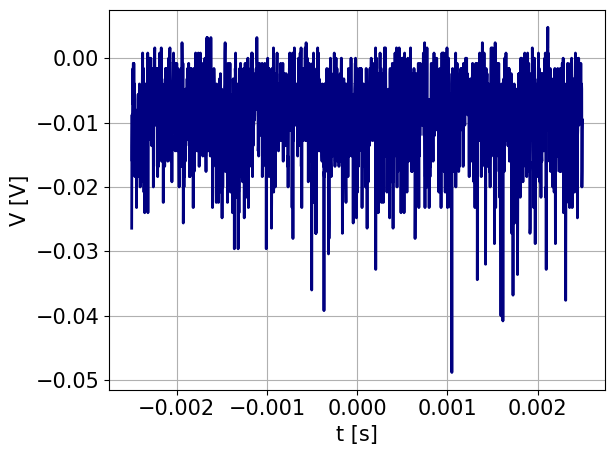

In [459]:
df = pd.read_csv(f'{carpeta}/{i}.csv')
plt.plot(df.t,df.V1,'navy',label='Láser prendido')
#df = pd.read_csv(f'plots/clase2/ruido 500 mus/{i}.csv')
#plt.plot(df.t,df.V1,'crimson',label='Láser apagado')

#plt.axhline(avg_r-5*std_r)
#plt.ylim(-0.015,0.01)
plt.xlabel('t [s]')
plt.ylabel('V [V]')
plt.grid()
plt.tight_layout()
plt.savefig('plots/imgs/señal láser abierto.png')

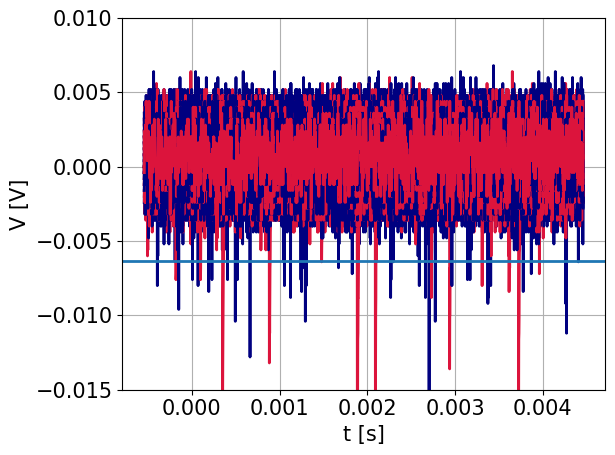

In [314]:
for i in range(100):
    df = pd.read_csv(f'{carpeta}/{i}.csv')
    plt.plot(df.t,df.V1,'navy')
    
    df = pd.read_csv(f'plots/clase2/ruido 500 mus/{i}.csv')
    plt.plot(df.t,df.V1,'crimson')

plt.axhline(avg_r-5*std_r)
plt.ylim(-0.015,0.01)
plt.xlabel('t [s]')
plt.ylabel('V [V]')
plt.grid()
plt.tight_layout()
plt.show()

In [440]:
values = []
for name in names:
    df = pd.read_csv(f'{carpeta}/{name}.csv')
#    pk_idxs = fp(-df.V1,distance=None)[0]
    values.extend(df.V1)#[pk_idxs])
values = np.array(values)

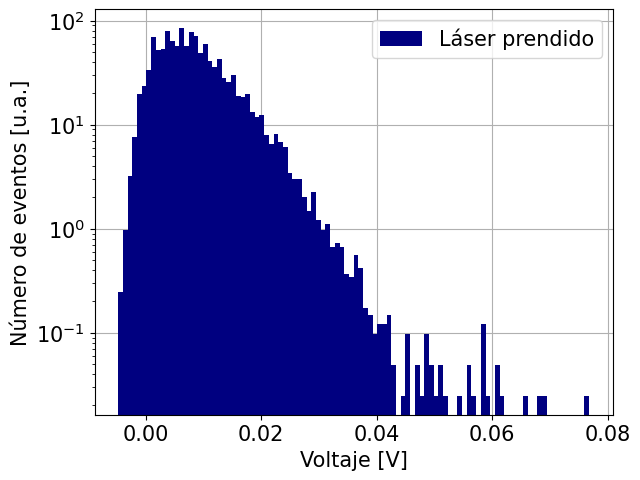

In [444]:
n,bins,patches = plt.hist(-values,bins=100,density=True,histtype='stepfilled',color='navy',label='Láser prendido')
#n2,bins2,patches2 = plt.hist(-ruido,bins=50,density=True,histtype='stepfilled',color='crimson',label='Láser apagado')

# plt.ylim(0,20)
# plt.xlim(0,0.025)
plt.yscale('log')
plt.grid()
plt.tight_layout()
plt.xlabel('Voltaje [V]')
plt.ylabel('Número de eventos [u.a.]')
plt.legend()
#plt.ylim(0,130)
plt.show()

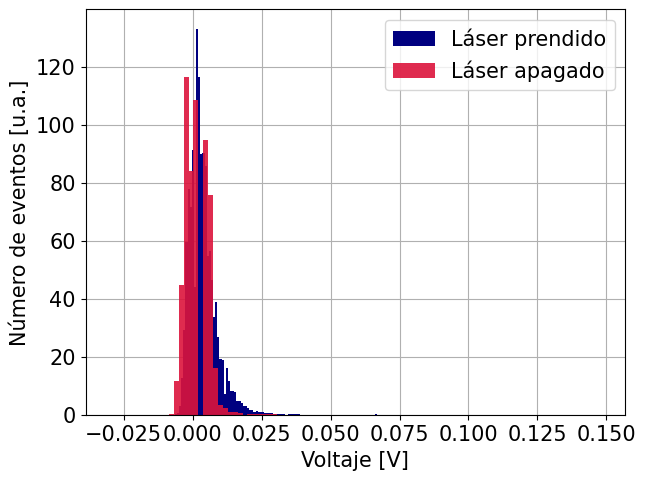

In [446]:
a=100
n1,bins1,patches1 = plt.hist(-values,bins=a,density=True,histtype='stepfilled',color='navy',label='Láser prendido')
n2,bins2,patches2 = plt.hist(-ruido,bins=a,density=True,histtype='stepfilled',color='crimson',label='Láser apagado')
for patch in patches2:
    patch.set_alpha(0.9)
# plt.xlim(0,0.025)
#plt.yscale('log')
plt.grid()
plt.tight_layout()
plt.xlabel('Voltaje [V]')
plt.ylabel('Número de eventos [u.a.]')
plt.legend()
#plt.ylim(0,130)
plt.show()

In [21]:
values_pk = []
for name in names:
    df = pd.read_csv(f'plots/clase2/variando T/{name}.csv')
    pk_idxs = fp(-df.V1,distance=10,prominence=0.005)[0]
    values_pk.extend(df.V1)
values_pk = np.array(values_pk)

In [95]:
ruido_pk = []
for i in range(200):
    df = pd.read_csv(f'plots/clase2/ruido detector 300/{i}.csv')
    pk_idxs = fp(-df.V1,prominence=0.0081)[0]
    ruido_pk.extend(df.V1[pk_idxs])
ruido_pk = np.array(ruido_pk)

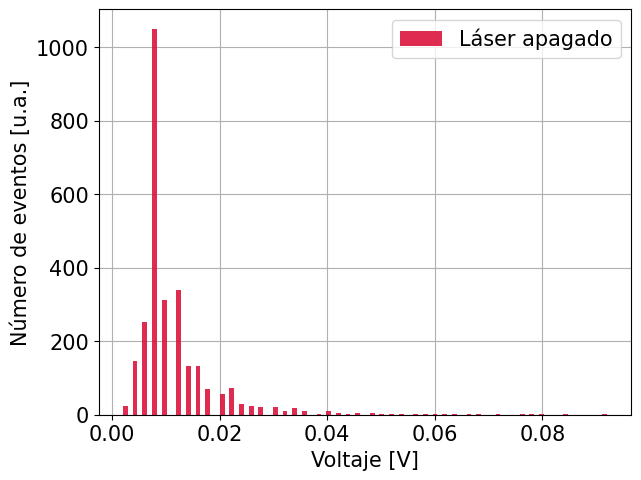

In [111]:
#n1,bins1,patches1 = plt.hist(-values_pk,bins=100,density=True,histtype='stepfilled',color='navy',label='Láser prendido')
n2,bins2,patches2 = plt.hist(-ruido_pk,bins=100,density=False,histtype='stepfilled',color='crimson',label='Láser apagado')
for patch in patches2:
    patch.set_alpha(0.9)

plt.grid()
plt.tight_layout()
plt.xlabel('Voltaje [V]')
plt.ylabel('Número de eventos [u.a.]')
plt.legend()
#plt.ylim(0,130)
plt.show()

In [345]:
pks_num = []
for name in names:
    df = pd.read_csv(f'{carpeta}/{name}.csv')
    pk_idxs = fp(-df.V1,distance=10)[0]
    pks_num.append(len(pk_idxs))
pks_num = np.array(pks_num)

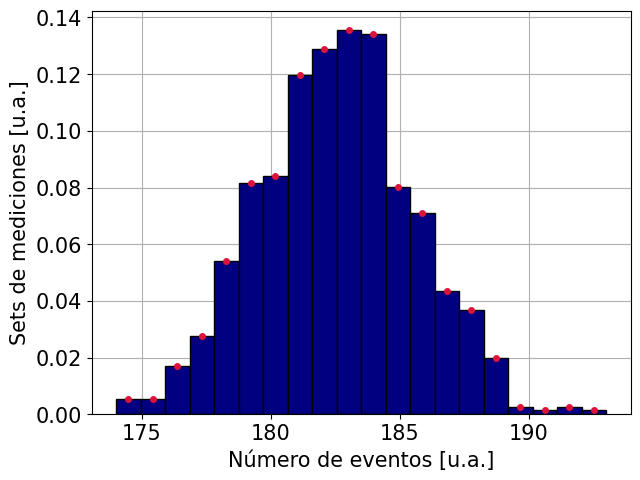

In [346]:
n,bins,patches = plt.hist(pks_num,bins=20,density=True,color='navy',edgecolor='black')

hist_points = bins[:-1]+np.diff(bins)/2

plt.scatter(hist_points,n,c='crimson')

plt.grid()
plt.tight_layout()
plt.xlabel('Número de eventos [u.a.]')
plt.ylabel('Sets de mediciones [u.a.]')
#plt.ylim(0,130)
plt.show()

In [349]:
poissoniana = lambda x,mu : stats.poisson.pmf(x,mu=mu)

C:\Users\publico\AppData\Local\Temp\ipykernel_6476\272921242.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  pars,cov = cf(poissoniana,hist_points,n,p0=[np.mean(hist_points)])


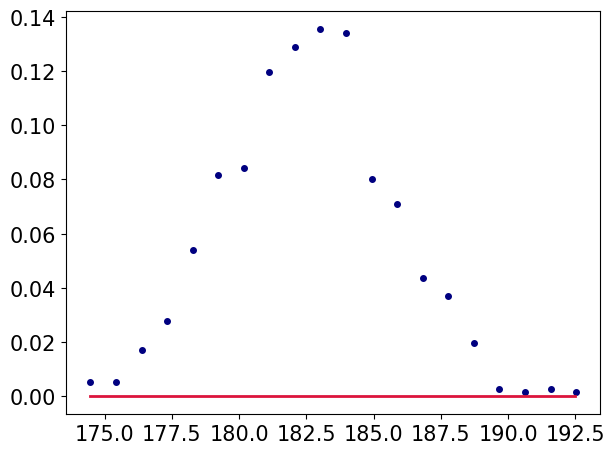

In [351]:
pars,cov = cf(poissoniana,hist_points,n,p0=[np.mean(hist_points)])

mu = pars[0]
x_adj = np.arange(min(hist_points),max(hist_points))

plt.scatter(hist_points,n,c='navy')
plt.plot(x_adj,poissoniana(x_adj,mu),c='crimson')

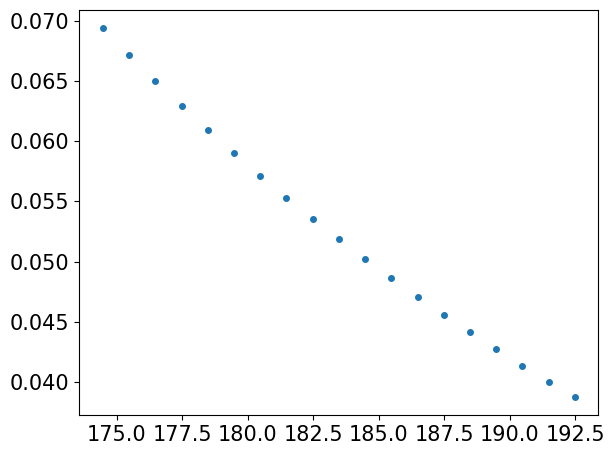

In [163]:
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_squared_error

X = hist_points.reshape(-1,1)
Y = n

model = PoissonRegressor(alpha=0.0)
model.fit(X,Y)

x_pred = np.arange(min(hist_points),max(hist_points))
y_pred = model.predict(x_pred.reshape(-1,1))

plt.scatter(x_pred,y_pred)

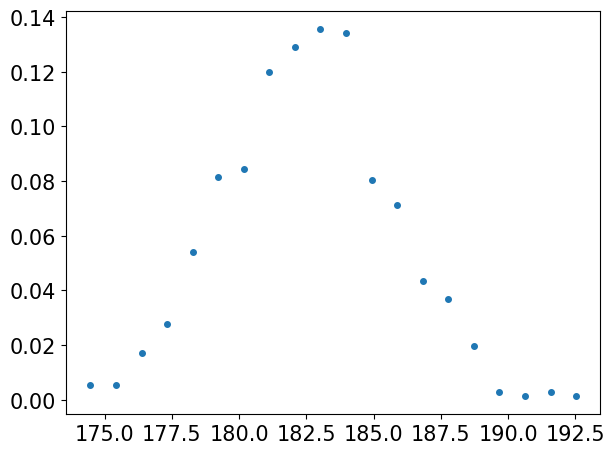

In [372]:
poissoniana = lambda x,mu : stats.poisson.pmf(x,mu)
x=np.linspace(0,200,2000)
X = hist_points.reshape(-1,1)
Y = n
plt.scatter(X,Y)
# plt.plot(stats.poisson.pmf(x,189))